First, we want to fit the data with a logistic model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
names = ['age','workclass','fnlwgt','education','education-num','marital-status' ,  'occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv('adult_data.txt',header=None,delim_whitespace=True,names=names,na_values='?',index_col=None)
df_test = pd.read_csv('adult_test.txt',header=None,delim_whitespace=True,names=names,na_values='?',index_col=None)
df.dropna()
df_test.dropna()
df.head(6)
df_test.head(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [4]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


Some of the features are categorical, so we need to encode them with either one-hot coding or linear encoder.

In [5]:
# One-hot coding
from sklearn.preprocessing import LabelEncoder
ohc_category = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'
                 ,'native-country']
le_category=['sex','income']

df_ohc_train = pd.get_dummies(df,columns=ohc_category)
df_ohc_test = pd.get_dummies(df_test,columns=ohc_category)


In [6]:
# linear encoder
df_le_train = df_ohc_train.copy()
df_le_test = df_ohc_test.copy()
for item in le_category:
    df_le_train[item] = LabelEncoder().fit_transform(df_le_train[item])  #bug
    df_le_test[item] = LabelEncoder().fit_transform(df_le_test[item])


In [7]:
# get training data and labels
X_train_df = df_le_train.drop(['income'],axis=1)
X_train = np.array(X_train_df)
y_train = np.array(df_le_train['income'])

# get test data and labels
X_test = np.array(df_le_test.drop(['income'],axis=1))
y_test = np.array(df_le_test['income'])

In [8]:
print(X_train_df.dtypes)
X_train_df.head(6)

age                                          int64
fnlwgt                                       int64
education-num                                int64
sex                                          int64
capital-gain                                 int64
capital-loss                                 int64
hours-per-week                               int64
workclass_Federal-gov                        uint8
workclass_Local-gov                          uint8
workclass_Never-worked                       uint8
workclass_Private                            uint8
workclass_Self-emp-inc                       uint8
workclass_Self-emp-not-inc                   uint8
workclass_State-gov                          uint8
workclass_Without-pay                        uint8
education_10th                               uint8
education_11th                               uint8
education_12th                               uint8
education_1st-4th                            uint8
education_5th-6th              

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We will train the model with all data in the trainin set and test the model with the test data.

In [9]:
nsamples_tr = X_train.shape[0]
nsamples_ts = X_test.shape[0]
nfeatures = X_train.shape[1]

print('Number of samples for training = %d' % nsamples_tr)
print('Number of samples for test = %d' % nsamples_ts)
print('Number of features = %d' % nfeatures)


Number of samples for training = 32560
Number of samples for test = 16281
Number of features = 103


In [14]:
# data normalization
Xtr_mean = np.mean(X_train,axis=0)
Xtr_std = np.std(X_train,axis=0)
Xtr_s = (X_train-Xtr_mean)/Xtr_std[None,:]
Xts_s = (X_test-Xtr_mean[None,:])/Xtr_std[None,:]

We also want to select a best order for this logistic model. So we decide to transform the numerous features to higher orders and compare accuracy.

In [13]:
# num_category stores features that are continuous 
num_category = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

# get columns index of num_category
ind_num = np.zeros((1,6))
for ind,item in enumerate(num_category):
    ind_num[0,ind] = int(X_train_df.columns.get_loc(item))

print(ind_num)



[[0. 1. 2. 4. 5. 6.]]


In [15]:
# extract columns
Xtr_num = np.zeros((nsamples_tr,6))
Xts_num = np.zeros((nsamples_ts,6))

for i,ind in enumerate(ind_num[0]):
    ind = int(ind)
    Xtr_num[:,i] = Xtr_s[:,ind]
    Xts_num[:, i] = Xts_s[:, ind]

Regarding order of transformed features, we will use order 2 to 10.
For each of the new training set, a higher order will be included.

In [16]:
# transform features with continuous values
# to different orders
add_Xtr = np.zeros((nsamples_tr,54))
add_Xts = np.zeros((nsamples_ts,54))
order_v = [2,3,4,5,6,7,8,9,10]
for i,order in enumerate(order_v):
    Xtri = Xtr_num**i
    add_Xtr[:,(i*6):(i*6+6)] = Xtri

    Xtsi = Xts_num ** i
    add_Xts[:, (i * 6):(i * 6 + 6)] = Xtsi

In [17]:
# create model
from sklearn import linear_model
acc = np.zeros((10,2))
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(Xtr_s,y_train)

yhat_tr = logreg.predict(Xtr_s)
acc_tr = np.mean(yhat_tr == y_train)
print("Accuracy of the classfier on training data = %f" % acc_tr)

yhat_ts = logreg.predict(Xts_s)
acc_ts = np.mean(yhat_ts == y_test)
print("Accuracy of the classfier on test data = %f" % acc_ts)

acc[0,:]=[acc_tr,acc_ts]

Accuracy of the classfier on training data = 0.853317
Accuracy of the classfier on test data = 0.852589


In [18]:
# add transformed features of different order to training data
for ind,order in enumerate(order_v):
    addXtr = add_Xtr[:,:(ind*6+6)]
    addXts = add_Xts[:, :(ind * 6 + 6)]
    Xtr_i = np.hstack((Xtr_s,addXtr))
    Xts_i = np.hstack((Xts_s, addXts))
    logregi = linear_model.LogisticRegression(C=1e5)
    logregi.fit(Xtr_i, y_train)

    yhati_tr = logregi.predict(Xtr_i)
    acci_tr = np.mean(yhati_tr == y_train)
    acc[ind+1,0] = acci_tr

    yhati_ts = logregi.predict(Xts_i)
    acci_ts = np.mean(yhati_ts == y_test)
    acc[ind + 1, 1] = acci_ts


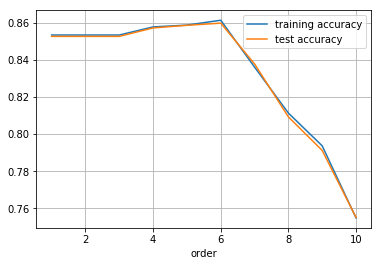

[[0.85331695 0.85258891]
 [0.85331695 0.85258891]
 [0.85331695 0.85258891]
 [0.85767813 0.85713408]
 [0.85866093 0.85854677]
 [0.8612715  0.85971378]
 [0.8360258  0.83772496]
 [0.81130221 0.80922548]
 [0.79364251 0.79116762]
 [0.75485258 0.75511332]]


In [19]:
# plot accuracy vs order
x_v = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x_v,acc[:,0])
plt.plot(x_v,acc[:,1])
plt.xlabel('order')
plt.legend(['training accuracy','test accuracy'])
plt.grid()
plt.show()

print(acc)

As we can see, the highest accuracy is achieved at order of 6 and decreases as the order increases.